In [1]:
import pandas as pd
from pymongo import MongoClient

from config.config import (
    all_weather_data
)

from utils.get_cities_data import get_cities_data
from utils.data_process import data_process
from utils.get_box_plots import get_box_plots
from utils.data_storage import data_storage
from utils.wind_presure_process import wind_presure_process
from utils.data_refinement import data_refinement
from utils.monitor_city import monitor_city
from utils.analyze_monitoreo import analyze_monitoreo


In [2]:
get_cities_data()

Consultando datos para Bogota (Intento 1/3)...
Datos de Bogota extraídos exitosamente.
Consultando datos para Medellin (Intento 1/3)...
Datos de Medellin extraídos exitosamente.
Consultando datos para Cali (Intento 1/3)...
Datos de Cali extraídos exitosamente.
Consultando datos para London (Intento 1/3)...
Datos de London extraídos exitosamente.
Consultando datos para New York (Intento 1/3)...
Datos de New York extraídos exitosamente.
Consultando datos para Sydney (Intento 1/3)...
Datos de Sydney extraídos exitosamente.
Consultando datos para Cairo (Intento 1/3)...
Datos de Cairo extraídos exitosamente.
Consultando datos para Rio de Janeiro (Intento 1/3)...
Datos de Rio de Janeiro extraídos exitosamente.


In [3]:
df_clima = pd.DataFrame(all_weather_data)

print("\n--- Vista previa del DataFrame de Clima (primeras 5 filas) ---")
print(df_clima.head().to_markdown(index=False))

print("\n--- Información Concisa del DataFrame (Tipos de datos y valores no nulos) ---")
print(df_clima.info())

print("\n--- Resumen Estadístico Descriptivo del DataFrame ---")
print(df_clima.describe(include='all').to_markdown())



--- Vista previa del DataFrame de Clima (primeras 5 filas) ---
| ciudad           |   temperatura |   sensacion_termica |   temp_min |   temp_max |   humedad |   presion | descripcion_clima   |   viento_velocidad |   nubes_porcentaje | fecha_hora_consulta_utc   |
|:-----------------|--------------:|--------------------:|-----------:|-----------:|----------:|----------:|:--------------------|-------------------:|-------------------:|:--------------------------|
| Bogota           |         14.73 |               14.27 |      14.73 |      14.73 |        77 |      1022 | muy nuboso          |               2.06 |                 75 | 2025-05-29 02:02:12+00:00 |
| Medellín         |         18.42 |               18.62 |      17.46 |      19.26 |        88 |      1017 | nubes               |               1.34 |                 99 | 2025-05-29 02:04:07+00:00 |
| Santiago de Cali |         19.43 |               19.47 |      19.43 |      23    |        78 |      1014 | cielo claro         |  

In [4]:
data_process(df_clima)


--- Iniciando Procesamiento y Análisis Avanzado de Datos ---

Conteos de valores nulos por columna (antes de la limpieza profunda):
|                         |   0 |
|:------------------------|----:|
| ciudad                  |   0 |
| temperatura             |   0 |
| sensacion_termica       |   0 |
| temp_min                |   0 |
| temp_max                |   0 |
| humedad                 |   0 |
| presion                 |   0 |
| descripcion_clima       |   0 |
| viento_velocidad        |   0 |
| nubes_porcentaje        |   0 |
| fecha_hora_consulta_utc |   0 |
No se encontraron filas con valores nulos en columnas cruciales para eliminar.

Conteos de valores nulos por columna (después de la limpieza):
|                         |   0 |
|:------------------------|----:|
| ciudad                  |   0 |
| temperatura             |   0 |
| sensacion_termica       |   0 |
| temp_min                |   0 |
| temp_max                |   0 |
| humedad                 |   0 |
| presion 


--- Generando Visualizaciones de Datos ---


/home/personal/Projects/data-extract-mongo/src/utils/get_box_plots.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ciudad', y='temperatura', data=df_clima,


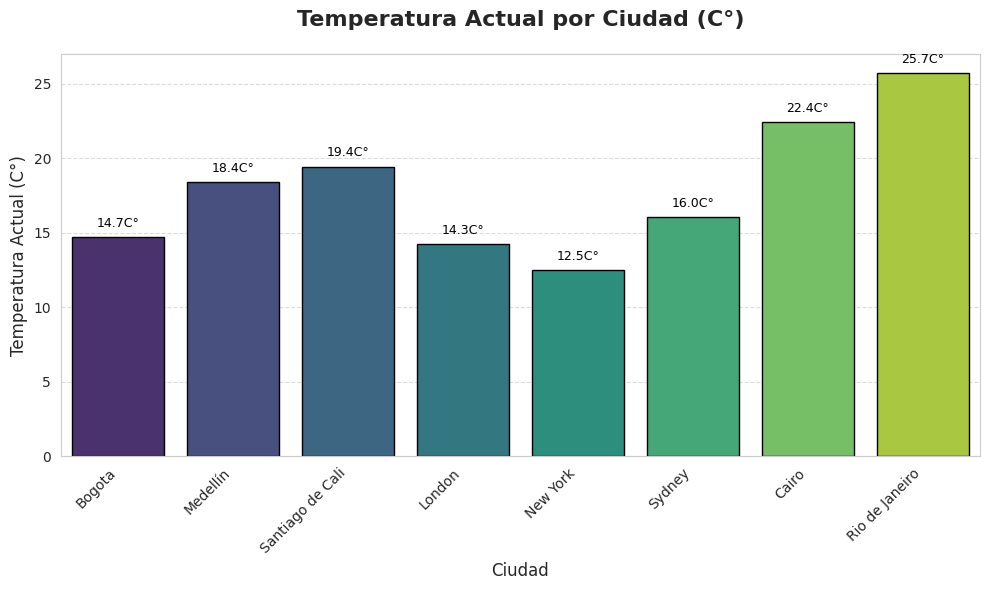

Gráfico de Temperaturas por Ciudad generado.


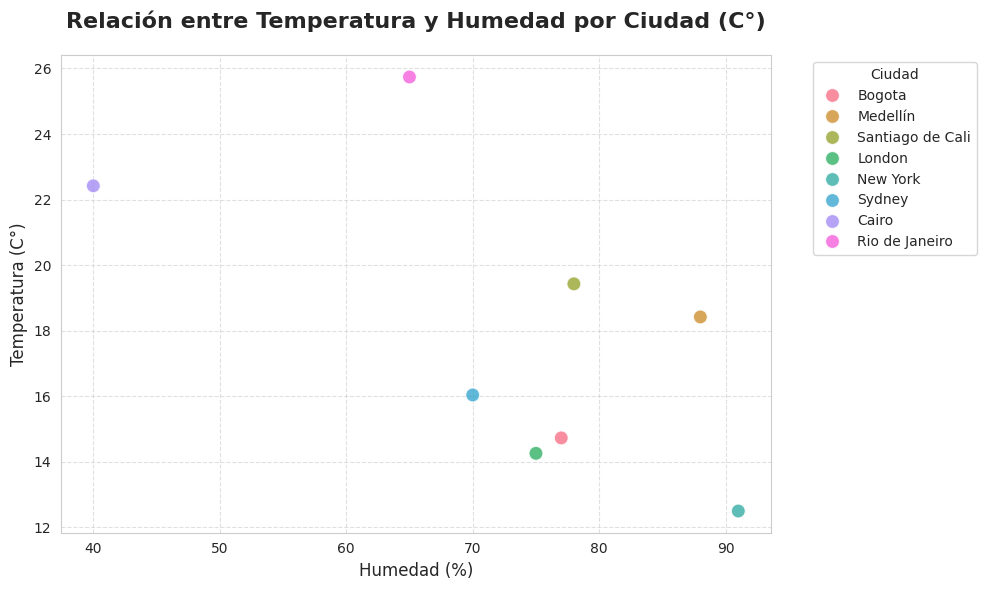

Gráfico de Dispersión (Temperatura vs. Humedad) generado.


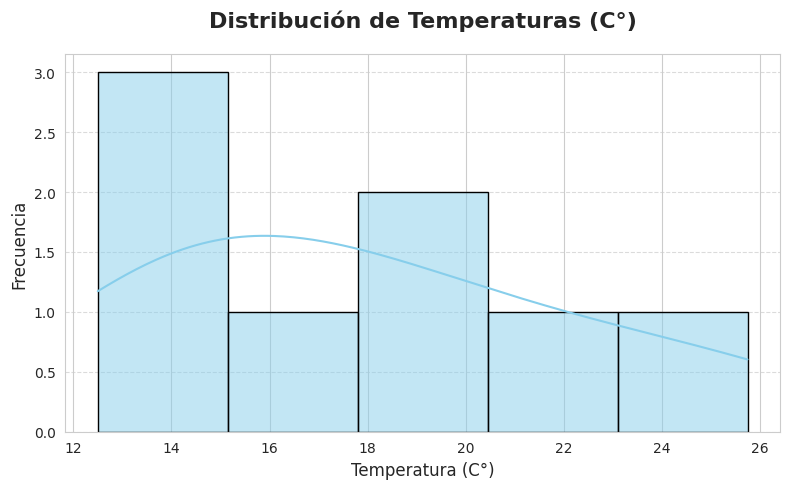

Histograma de Temperaturas generado.


/home/personal/Projects/data-extract-mongo/src/utils/get_box_plots.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='categoria_temperatura', y='temperatura', data=df_clima,


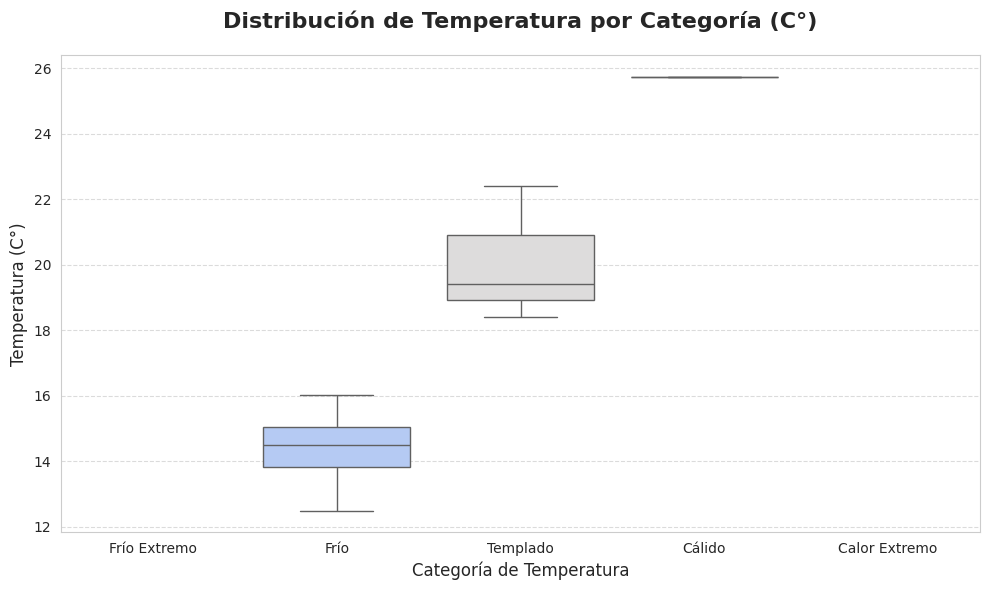

Box Plot de Temperaturas por Categoría generado.

--- Proceso de visualización de datos completado ---


In [5]:
get_box_plots(df_clima)

In [6]:
data_storage(df_clima)


--- Iniciando Almacenamiento y Operaciones Avanzadas en MongoDB ---
Conexión exitosa a MongoDB.

Borrando documentos existentes en la colección 'datos_meteorologicos' para una inserción fresca...
Documentos eliminados: 8
Insertando 8 documentos en la colección 'datos_meteorologicos'...
Número de documentos insertados: 8.

--- Verificando datos en MongoDB con consultas avanzadas ---

Documentos con las 5 temperaturas más altas (ciudad y temperatura):
{'ciudad': 'Rio de Janeiro', 'temperatura': 25.74}
{'ciudad': 'Cairo', 'temperatura': 22.42}
{'ciudad': 'Santiago de Cali', 'temperatura': 19.43}
{'ciudad': 'Medellín', 'temperatura': 18.42}
{'ciudad': 'Sydney', 'temperatura': 16.04}

Todos los documentos de 'Medellin':

Documentos con humedad superior al 75% (ciudad y humedad):
{'ciudad': 'Bogota', 'humedad': 77}
{'ciudad': 'Medellín', 'humedad': 88}
{'ciudad': 'Santiago de Cali', 'humedad': 78}
{'ciudad': 'New York', 'humedad': 91}

--- Actualizando un documento en MongoDB ---
Documentos


--- Análisis Comparativo de Viento y Presión ---

Resumen de velocidad del viento y presión por ciudad:
| ciudad           |   velocidad_viento_promedio |   presion_promedio |
|:-----------------|----------------------------:|-------------------:|
| Bogota           |                        2.06 |               1022 |
| Cairo            |                        0.51 |               1012 |
| London           |                        3.6  |               1020 |
| Medellín         |                        1.34 |               1017 |
| New York         |                        5.66 |               1022 |
| Rio de Janeiro   |                        3.6  |               1015 |
| Santiago de Cali |                        1.54 |               1014 |
| Sydney           |                        7.72 |               1019 |

Ciudad con mayor velocidad del viento: Sydney (7.72 m/s)
Ciudad con mayor presión atmosférica: Bogota (1022.00 hPa)


/home/personal/Projects/data-extract-mongo/src/utils/wind_presure_process.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ciudad', y='viento_velocidad', data=df_clima, ax=ax1, palette='viridis')
/home/personal/Projects/data-extract-mongo/src/utils/wind_presure_process.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ciudad', y='presion', data=df_clima, ax=ax2, palette='plasma')


<Figure size 1200x600 with 0 Axes>

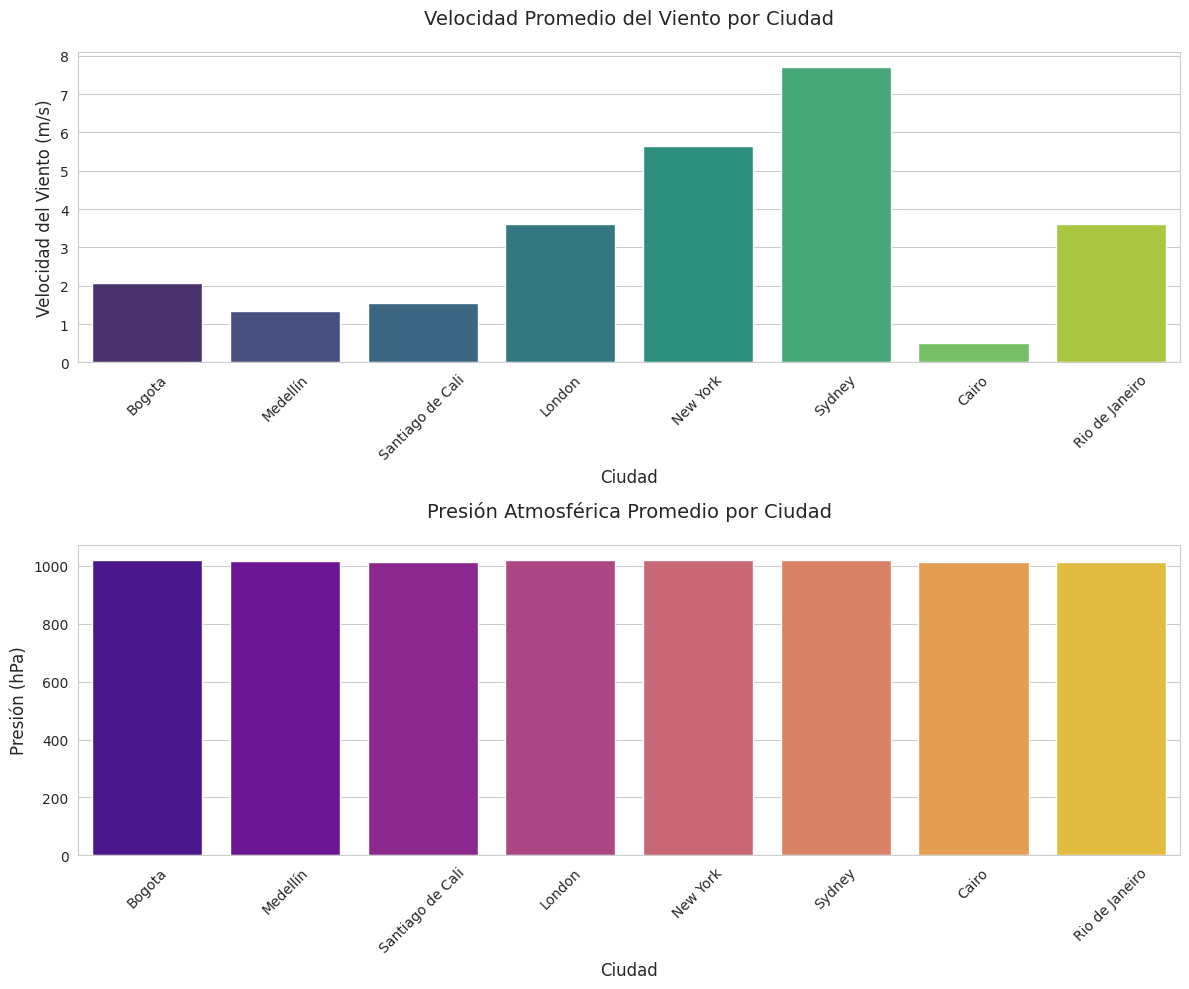

Gráficos de Velocidad del Viento y Presión Atmosférica generados.

--- Almacenamiento de Datos Históricos en MongoDB ---
Conexión exitosa a MongoDB.

Insertando 8 documentos en la colección histórica...
Número de documentos insertados: 8

Verificando datos históricos insertados:
{
  "ciudad": "Bogota",
  "presion": 1020,
  "viento_velocidad": 2.06,
  "timestamp_insercion": "2025-05-28 19:43:22.899000"
}
{
  "ciudad": "Medell\u00edn",
  "presion": 1016,
  "viento_velocidad": 1.34,
  "timestamp_insercion": "2025-05-28 19:43:22.899000"
}
{
  "ciudad": "Santiago de Cali",
  "presion": 1013,
  "viento_velocidad": 4.63,
  "timestamp_insercion": "2025-05-28 19:43:22.899000"
}

Conexión a MongoDB cerrada exitosamente.


In [7]:
wind_presure_process(df_clima)


--- Ejercicio 2: Refinamiento de Datos y Consulta Avanzada ---
Conexión exitosa a MongoDB para análisis avanzado.

Número total de documentos en la colección: 32

Cargando datos selectivos desde MongoDB...

Datos cargados exitosamente. Número de registros: 32

Distribución de horas (UTC y Local):

Horas UTC:
|   hora_del_dia_utc |   count |
|-------------------:|--------:|
|                  0 |       8 |
|                  1 |      11 |
|                  2 |      13 |

Horas Locales (UTC-5):
|   hora_del_dia_local |   count |
|---------------------:|--------:|
|                   19 |       8 |
|                   20 |      11 |
|                   21 |      13 |

ADVERTENCIA: No hay datos en el rango horario local especificado (8:00 - 18:00)
Analizando todos los datos disponibles...

Vista previa del DataFrame filtrado:
| ciudad           |   temperatura |   humedad | fecha_hora_consulta_utc   | fecha_hora_local    |   hora_del_dia_utc |   hora_del_dia_local |
|:-----------------|-

/home/personal/Projects/data-extract-mongo/src/utils/data_refinement.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ciudad', y='temperatura', data=df_filtrado, ax=ax1, palette='coolwarm')
/home/personal/Projects/data-extract-mongo/src/utils/data_refinement.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ciudad', y='humedad', data=df_filtrado, ax=ax2, palette='Blues')
/home/personal/Projects/data-extract-mongo/src/utils/data_refinement.py:165: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


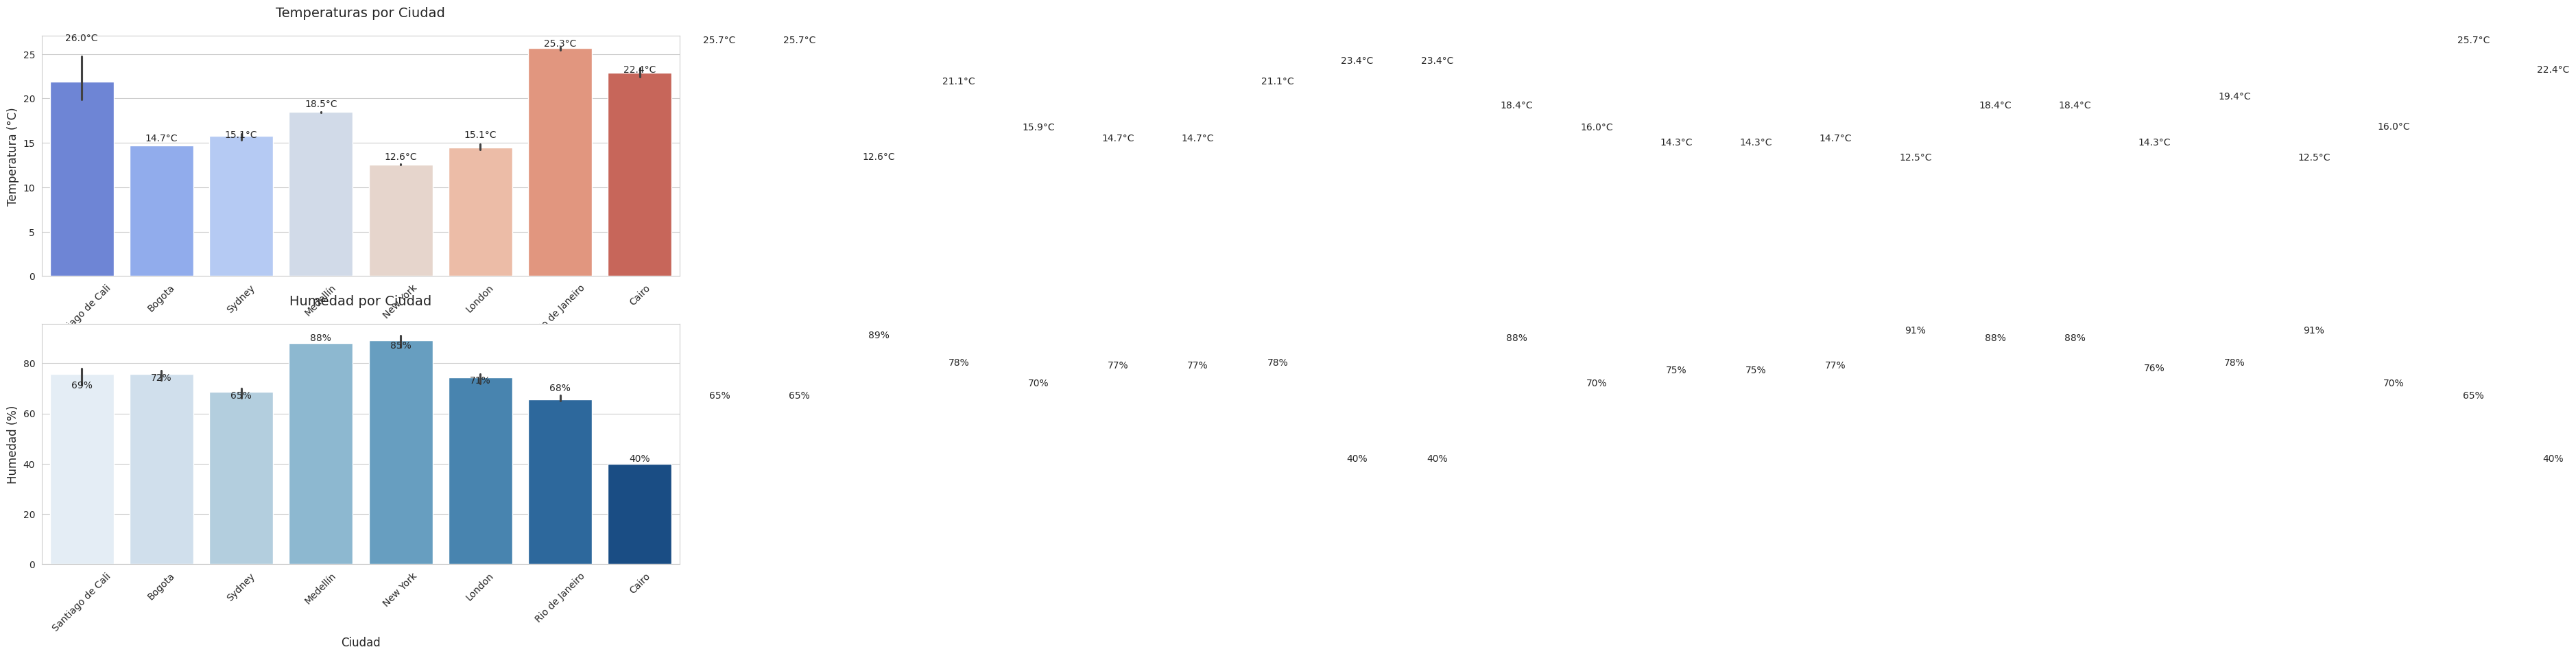


Gráficos de temperatura y humedad generados.

--- Análisis de Correlación ---

Correlación entre temperatura y humedad:
|             |   temperatura |   humedad |
|:------------|--------------:|----------:|
| temperatura |          1    |     -0.57 |
| humedad     |         -0.57 |      1    |


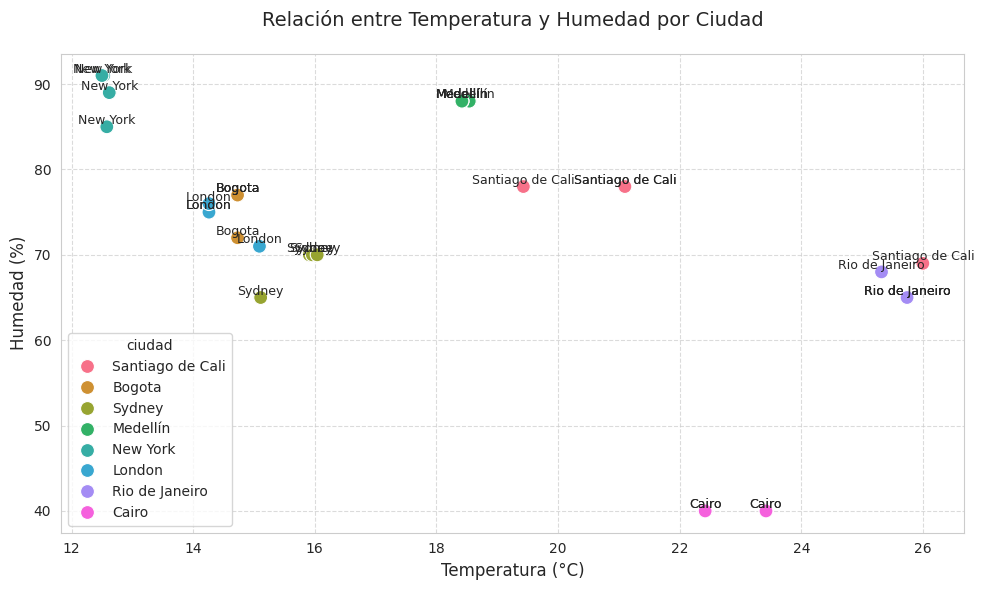


Gráfico de dispersión temperatura vs humedad generado.

Conexión a MongoDB cerrada.


In [8]:
data_refinement()

In [9]:
monitor_city('Bogota', duracion_minutos=1, intervalo_segundos=20)

Conexión exitosa a MongoDB para monitoreo de Bogota

Iniciando monitoreo de Bogota por 1 minutos
Intervalo entre consultas: 20 segundos
Número total de iteraciones: 3

Iteración 1/3
Datos insertados exitosamente. ID: 6837c23ec59a579929b6fed7
Temperatura: 14.73°C, Humedad: 77%
Esperando 20 segundos hasta la siguiente consulta...

Iteración 2/3
Datos insertados exitosamente. ID: 6837c252c59a579929b6fed8
Temperatura: 14.73°C, Humedad: 77%
Esperando 20 segundos hasta la siguiente consulta...

Iteración 3/3
Datos insertados exitosamente. ID: 6837c267c59a579929b6fed9
Temperatura: 14.73°C, Humedad: 77%

Monitoreo completado exitosamente
Conexión a MongoDB cerrada


Conexión exitosa a MongoDB para análisis de datos

Total de documentos en la colección: 18

Rango de fechas en los datos:
Primera medición: 2025-05-29 00:48:20
Última medición: 2025-05-29 02:05:57

Número de grupos horarios encontrados: 3

Resultados del análisis por hora:
|   hora |   temperatura_promedio |   humedad_promedio |   viento_promedio |   conteo |
|-------:|-----------------------:|-------------------:|------------------:|---------:|
|      0 |                  14.73 |              72    |              2.06 |        1 |
|      1 |                  14.73 |              74.14 |              2.06 |       14 |
|      2 |                  14.73 |              77    |              2.57 |        3 |

Detalles de las mediciones por hora:

Hora 0:
  Temperatura: 14.73°C, Humedad: 72%, Fecha: 2025-05-29 00:48:20

Hora 1:
  Temperatura: 14.73°C, Humedad: 72%, Fecha: 2025-05-29 01:01:27
  Temperatura: 14.73°C, Humedad: 72%, Fecha: 2025-05-29 01:01:27
  Temperatura: 14.73°C, Humedad: 72

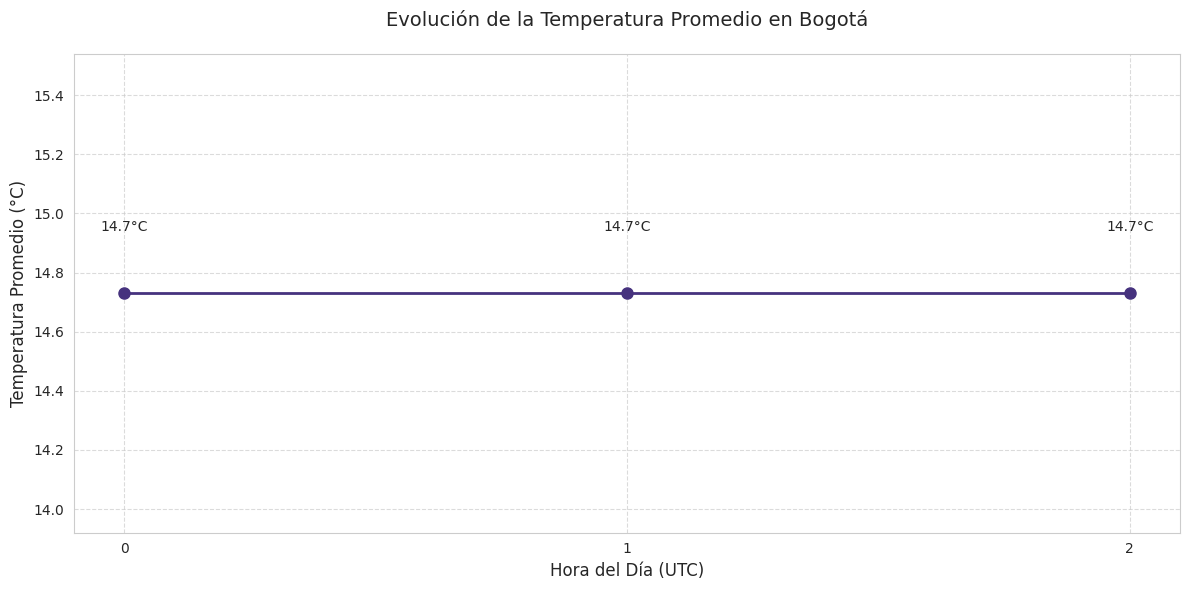


Gráfico de evolución de temperatura generado
Conexión a MongoDB cerrada


In [10]:
analyze_monitoreo()